# HW2 : Math for Robotics

Author: Ruffin White  
Course: CSE291  
Date: Feb 8 2018

In [1]:
# Make plots inline
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'svg')
# set_matplotlib_formats('png', 'pdf')
set_matplotlib_formats('png')

# import modules for plotting and data analysis
import matplotlib.pyplot as plt

## 1. 

> Prove that the first derivative $p'_2(x)$ of the parabola interpolating $f(x)$ at $x_0 < x_1 < x_2$ is equal to the straight line which takes on the value $f[x_{i−1}, x_i]$ at the point $(x_{i−1} + x_i)/2$, for $i = 1, 2$.

Given the shorthand notaion for the divided diffrence defines: 

$$
f[x_{i−1}, x_i] = \dfrac{f(x_i)-f(x_{i-1})}{x_i - x_{i-1}}
$$

And that $p_2(x)$ and $p'_2(x)$ for a parabola can be written as:

$$
p_2(x) = ax^2 + bx + c
$$
$$
p'_2(x) = p_1(x) = 2ax + b
$$

From this we can see $p_1(x)$ assumes a line in the form of $y=mx+b$. The general pressmis we'd like to prove can be stated as so:

$$
f[x_{i-1}, x_i] = p_1(x)  \quad x = (x_{i-1} + x_i)/2 \quad i \in [0, 1, 2] \\
$$

Substituting for $x$ in $p_1(x)$, we get: 

$$
\dfrac{f(x_{i})-f(x_{i-1})}{x_{i} - x_{i-1}} = a(x_{i-1} + x_i) + b \\
$$

Given that $p_2(x)$ is equal to $f(x)$ for the samples we have:

$$
f(x_i) = p_2(x_i), \quad i \in [0, 1, 2] \\
$$

We can substitute $p_2(x)$ for $f(x)$ in the divided diffrence, them simplify:

$$
\dfrac{(ax_{i}^2 + bx_{i} + c) - (ax_{i-1}^2 + bx_{i-1} + c)}{x_{i} - x_{i-1}} = a(x_{i-1} + x_{i}) + b \\
$$
$$
\dfrac{(ax_{i}^2 + bx_{i}) - (ax_{i-1}^2 + bx_{i-1})}{x_{i} - x_{i-1}} = a(x_{i-1} + x_{i}) + b \\
$$
$$
\dfrac{a(x_{i} - x_{i-1})^2 + b(x_{i} - x_{i-1})}{x_{i} - x_{i-1}} = a(x_{i-1} + x_{i}) + b \\
$$
$$
a(x_{i} - x_{i-1}) + b = a(x_{i-1} + x_{i}) + b \\
$$

So, unless there is an error in my assumptions or reductions, I think there might be a typo in that the point given shoudl be instead: $(x_{i} - x_{i-1})/2$, for $i = 1, 2$. This would then satifiy the above proof, when substituting the point on the right hand side.

## 2. 

### a

> Implement Muller's method.

See Jupyter Notebook for code.

In [2]:
import numpy as np
def muller(f, x2, x1, x0, maxiter):
    """
    Addapted from the Muller's Methods presented in Numerical Recipes 
    """
    # Limit our seach to a finite number of iterations
    for j in range(maxiter):
        print("Iteration: ", j)
        
        # Compute A, B, C and q
        q = (x0 - x1) / (x1 - x2)
        A = q*f(x0) - q*(1 + q)*f(x1) + (q**2)*f(x2)
        B = (2*q + 1)*f(x0) - ((1 + q)**2)*f(x1) + (q**2)*f(x2)
        C = (1 + q)*f(x0)
        print("  A: ", A)
        print("  B: ", B)
        print("  C: ", C)
        print("  x_i: ", x0)
        print("  x_{i-1}: ", x1)
        
        # To make sure the denominator is chosen to make its absolute value or modulus as large as possible
        if np.real(B) > 0:
            xi1 = x0 - (x0 - x1)*(2*C / (B + np.emath.sqrt(B**2 - 4*A*C)))
        else:
            xi1 = x0 - (x0 - x1)*(2*C / (B - np.emath.sqrt(B**2 - 4*A*C)))
        print("  x_{i+1}: ", xi1)
        
        # Hault seach if we are close enough
        if xi1 == x0:
#             # This also avoids numerical issues when A,BC get to small
            break
#         if f(xi1) < tol:
#             # This also avoids numerical issues when A,BC get to small
#             break
        x2 = x1
        x1 = x0
        x0 = xi1
    return xi1

### b
> Use Muller's method to find all the roots of the polynomial $p(x) = x^3 - 4x^2 + 6x - 4$.

In [3]:
def f(x):
    return x**3 - 4*x**2 + 6*x - 4

maxiter = 50

Using our Muller's method, we'll start by seaching for our first root. (Points close to the roots are chosen here to prevent exorbitantly large print-outs in the document for demonstration)

In [4]:
x0 = 2.1
x1 = 2.01
x2 = 1.9

print("  x_i: ", x0)
print("  x_{i-1}: ", x1)
print("  x_{i-2}: ", x2)
root = muller(f=f, x2=x2, x1=x1, x0=x0, maxiter=maxiter)
print("root: ", root)

  x_i:  2.1
  x_{i-1}:  2.01
  x_{i-2}:  1.9
Iteration:  0
  A:  0.0296018181818178
  B:  0.3946909090909126
  C:  0.401818181818186
  x_i:  2.1
  x_{i-1}:  2.01
  x_{i+1}:  2.00004974877
Iteration:  1
  A:  -0.00233051558625
  B:  0.022091878273
  C:  -1.10008305618e-05
  x_i:  2.00004974877
  x_{i-1}:  2.1
  x_{i+1}:  1.99999997511
Iteration:  2
  A:  5.20528934176e-09
  B:  -9.95966316446e-05
  C:  -4.97985752115e-08
  x_i:  1.99999997511
  x_{i-1}:  2.00004974877
  x_{i+1}:  2.0
Iteration:  3
  A:  1.23884476907e-15
  B:  4.9749025369e-08
  C:  1.2250733729e-13
  x_i:  2.0
  x_{i-1}:  1.99999997511
  x_{i+1}:  2.0
Iteration:  4
  A:  -4.37427537128e-21
  B:  -1.20791972002e-13
  C:  1.77635246511e-15
  x_i:  2.0
  x_{i-1}:  2.0
  x_{i+1}:  2.0
Iteration:  5
  A:  -2.61174078467e-17
  B:  -3.63031969069e-15
  C:  -1.80210114142e-15
  x_i:  2.0
  x_{i-1}:  2.0
  x_{i+1}:  2.0
Iteration:  6
  A:  0.0
  B:  8.881784197e-16
  C:  0.0
  x_i:  2.0
  x_{i-1}:  2.0
  x_{i+1}:  2.0
root:  2.

Having found $x=2$ to be our first root, we can can deflate our original polonomal by deviding it out:

$$
q(x) = \frac{p(x)}{x - 2} = \frac{x^3 - 4x^2 + 6x - 4}{x - 2}
$$

In [5]:
x = np.array([1, -4, 6, -4])
y = np.array([1, -2])
quotient, remainder = np.polydiv(x, y)
print("quotient: ", quotient)
print("remainder: ", remainder)

quotient:  [ 1. -2.  2.]
remainder:  [ 0.]


We find our next Q after aplying the polynomial division:

$$
q(x) = x^2 - 2x + 2
$$

In [6]:
def q1(x):
    return x**2 - 2*x + 2

In [7]:
x2= 0 + 1
x1= 1j + 1.01
x0= 1j + 0


print("  x_i: ", x0)
print("  x_{i-1}: ", x1)
print("  x_{i-2}: ", x2)
root = muller(f=q1, x2=x2, x1=x1, x0=x0, maxiter=maxiter)
print("root: ", root)

  x_i:  1j
  x_{i-1}:  (1.01+1j)
  x_{i-2}:  1
Iteration:  0
  A:  (1.0097980201979802+1.03019798020198j)
  B:  (4.039596040395961+0.04039596040395984j)
  C:  (3.0096990300969906-0.96990300969903j)
  x_i:  1j
  x_{i-1}:  (1.01+1j)
  x_{i+1}:  (1+1j)
Iteration:  1
  A:  (0.00990099009901+0j)
  B:  (-6.53231808923e-18+0.019801980198j)
  C:  4.3969228698e-18j
  x_i:  (1+1j)
  x_{i-1}:  1j
  x_{i+1}:  (1+1j)
Iteration:  2
  A:  (4.93038065763e-32+0j)
  B:  (4.93038065763e-32-4.4408920985e-16j)
  C:  0j
  x_i:  (1+1j)
  x_{i-1}:  (1+1j)
  x_{i+1}:  (1+1j)
root:  (1+1j)


Now we have found $x=1+1j$ as our next root, and because we know complex roots always have a complex conjugate, we know $x=1-1j$ to be the other root as well. Thus we know all three roots have been found. Just to check our work, we can test this against numpy's own root finding function, by providing it the same coefficients for $p(x)$ as see this matchs.

In [8]:
coeff = [1, -4, 6, -4]
numpy_roots = np.roots(coeff)
print("numpy_roots: ", numpy_roots)

numpy_roots:  [ 2.+0.j  1.+1.j  1.-1.j]


## 3.

> Suppose you wish to build an interpolation table with entries of the form $(x, f(x))$ for the function $f(x) = sin(x)$ over the interval $[0, \pi]$. Please use uniform spacing between points.

* How fine must the table spacing be in order to ensure 6 decimal digit accuracy, assuming that you will use linear interpolation between adjacent points in the table?
* How fine must it be if you will use quadratic interpolation?
* In each case, how many entries do you need in the table?

In [9]:
import numpy as np
from scipy import interpolate

In [10]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
yvals = np.sin(xvals)
max_error = np.max(np.abs(yinterp - yvals))
max_error

4.7220041716755645e-06

In [11]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
# f = interpolate.interp1d(x, y, kind='linear')
f = interpolate.interp1d(x, y, kind='quadratic')
yinterp = f(xvals)
yvals = np.sin(xvals)
max_error = np.max(np.abs(yinterp - yvals))
max_error

1.1850615742048376e-06

In [12]:
max_error < 10e-6

True

In [13]:
nums = np.linspace(10, 10000, 100, dtype=int)
max_errors = np.array([])
for num in nums:
    x = np.linspace(0, 2*np.pi, num=num)
    y = np.sin(x)
    xvals = np.linspace(0, 2*np.pi, 10000)
    f = interpolate.interp1d(x, y, kind='linear')
#     f = interpolate.interp1d(x, y, kind='quadratic')
    yinterp = f(xvals)
    yvals = np.sin(xvals)
    max_error = np.max(np.abs(yinterp - yvals))
    max_errors = np.append(max_errors, max_error)

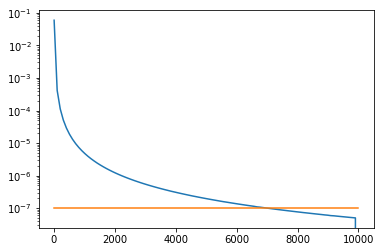

In [14]:
plt.semilogy(nums, max_errors)
plt.semilogy(nums, np.ones(max_errors.size)*1e-7)

In [15]:
nums = np.linspace(10, 1000, 100, dtype=int)
max_errors = np.array([])
for num in nums:
    x = np.linspace(0, 2*np.pi, num=num)
    y = np.sin(x)
    xvals = np.linspace(0, 2*np.pi, 10000)
#     f = interpolate.interp1d(x, y, kind='linear')
    f = interpolate.interp1d(x, y, kind='quadratic')
    yinterp = f(xvals)
    yvals = np.sin(xvals)
    max_error = np.max(np.abs(yinterp - yvals))
    max_errors = np.append(max_errors, max_error)

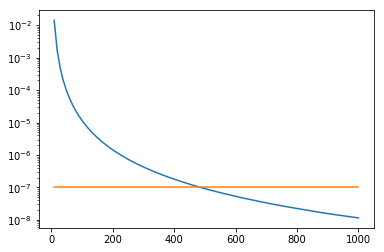

In [16]:
plt.semilogy(nums, max_errors)
plt.semilogy(nums, np.ones(max_errors.size)*1e-7)

In [17]:
max_errors = np.array([])


In [18]:
0.0000001

1e-07

In [19]:
10e-6

1e-05

## 4.
> Implement Newton's Method. Consider the following equation:
> $$x = tan(x)$$
> There are an infinite number of solutions $x$ to this equation. Use Newton's method (and any techniques you need to start Newton in regions of convergence) to find the two solutions that are closest to 5.

Given we know that $tan(x) = \frac{sin(x)}{cos(x)}$, we can see that $f(x) = tan(x) - x$ will be undifined for periodicity of $k \cdot \pi + \frac{\pi}{2}, k \in \mathbb{N}$. Additionally, we can decern the direvitive to be $f'(x) = sec^2(x) = \frac{1}{cos^2(x)}$.

Thus we can use the three closest singulatiesties to bracket the two intervals containing the two closest roots to 5. We can see the two closet intervals to be $[0 \cdot \pi + \frac{\pi}{2}, 1 \cdot \pi + \frac{\pi}{2}]$, and $[1 \cdot \pi + \frac{\pi}{2}, 2 \cdot \pi + \frac{\pi}{2}]$.

In [20]:
from scipy import optimize
import numpy as np

def f(x):
    return np.tan(x) - x

def fprime(x):
    return (1 / (np.cos(x)**2))

maxiter = 50
xacc = 1e-2
tol = 1.48e-08

For this task, we will narrow down the region of convergance by using bisection. This is gaernted to get us arbitrarily close to the root for regions where the function is continious. This is helpful for sharply discontious trigmaetric functions, as we can provide Newton's Method an accurate innital guess to help ensure convergance.

In [21]:
def root_bisection(f, x1, x2, maxiter, xacc):
    """
    Adapted from Numerical Recipes
    """
    fx1 = f(x1)
    fx2 = f(x2)
    # Check that root is bracketed
    if (fx1 * fx2 >= 0):
        raise("Root must be bracketed for bisection in rtbis")

    # Orient the search so that fx1 > 0 lies at x+dx.
    if fx1 < 0:
        dx = x2 - x1
        rtb = x1 
    else:
        dx = x1 - x2
        rtb = x2

    # Bisection loop.
    for i in range(maxiter):
        print("Bisection: ", i)
        dx = dx / 2
        xmid = rtb + dx
        print("  xmid: ", xmid)
        fmid = f(xmid)
        print("  fmid: ", fmid)
        if (fmid <= 0):
            rtb=xmid
        if (abs(dx) < xacc) or (fmid == 0):
            return rtb
    
    # Didn't reach target interval of size
    raise("Not enough bisections needed to reach xacc")

We'll also adjust our initial bounds inward into the region by a factor of a small $\alpha$, to help ensure our starting points are nuericaly stable. E.g. $x1 = 0 \cdot \pi + \frac{\pi}{2} + \alpha$ and $x2 = 1 \cdot \pi + \frac{\pi}{2} - \alpha$

In [22]:
alpha = 1e-9

x1 = 0 * np.pi + np.pi/2 + alpha
x2 = 1 * np.pi + np.pi/2 - alpha


print("alpha: ", alpha)
print("x1: ", x1)
print("x2: ", x2)
print("f(x1): ", f(x1))
print("f(x2): ", f(x2))

alpha:  1e-09
x1:  1.5707963277948966
x2:  4.71238897938469
f(x1):  -999999980.063
f(x2):  999999728.85


In [23]:
_x0 = root_bisection(f=f, x1=x1, x2=x2, maxiter=maxiter, xacc=xacc)

Bisection:  0
  xmid:  3.141592653589793
  fmid:  -3.14159265359
Bisection:  1
  xmid:  3.9269908164872414
  fmid:  -2.92699081749
Bisection:  2
  xmid:  4.319689897935966
  fmid:  -1.90547634068
Bisection:  3
  xmid:  4.516039438660328
  fmid:  0.511300030476
Bisection:  4
  xmid:  4.417864668298147
  fmid:  -1.121306469
Bisection:  5
  xmid:  4.466952053479238
  fmid:  -0.474728284
Bisection:  6
  xmid:  4.491495746069783
  fmid:  -0.038293539557
Bisection:  7
  xmid:  4.5037675923650555
  fmid:  0.219861715301
Bisection:  8
  xmid:  4.497631669217419
  fmid:  0.0869803711173


We can see the bisection method has zeroed down quite quickly to an intial estiment that is within a braket only $10^{-3}$ wide in only a few iterations.

In [24]:
def newton(func, x0, fprime, tol, maxiter):
    dx = abs(func(x0))
    for i in range(maxiter):
        print("Iteration: ", i)
        x0 = x0 - (func(x0) / fprime(x0))
        print("  x0: ", x0)
        dx = abs(func(x0))
        print("  dx: ", dx)
        if dx <= tol:
            return x0

In [25]:
x0_newtom = newton(func=f, x0=_x0, fprime=fprime, tol=tol, maxiter=maxiter)
print("x0_newtom: ", x0_newtom)

Iteration:  0
  x0:  4.49333404098
  dx:  0.00152218125895
Iteration:  1
  x0:  4.49340592209
  dx:  7.13894724633e-05
Iteration:  2
  x0:  4.4934092911
  dx:  3.3679276088e-06
Iteration:  3
  x0:  4.49340945004
  dx:  1.58931849015e-07
Iteration:  4
  x0:  4.49340945754
  dx:  7.50006901029e-09
x0_newtom:  4.49340945754


To compare our simple newtons methods above, we can check agianst numpy's own newton and Brent's (1973) method, where Brent's method is generally considered the best of the rootfinding routines in numpy, as it combines root bracketing, interval bisection, and inverse quadratic interpolation.

In [26]:
x0_numpy_newton = optimize.newton(func=f, x0=_x0, fprime=fprime, tol=tol, maxiter=maxiter)
print("x0_numpy_newton: ", x0_numpy_newton)

x0_numpy_newton:  4.49340945754


In [27]:
x0_numpy_brentq = optimize.brentq(f=f, a=x1, b=x2)
print("x0_numpy_brentq: ", x0_numpy_brentq)

x0_numpy_brentq:  4.493409457909064


We find all three methods return identical roots. Now lets check the second closest root.

In [28]:
x1 = 1 * np.pi + np.pi/2 + alpha
x2 = 2 * np.pi + np.pi/2 - alpha


print("alpha: ", alpha)
print("x1: ", x1)
print("x2: ", x2)
print("f(x1): ", f(x1))
print("f(x2): ", f(x2))

alpha:  1e-09
x1:  4.71238898138469
x2:  7.853981632974483
f(x1):  -1000000105.67
f(x2):  999999603.244


In [29]:
_x0 = root_bisection(f=f, x1=x1, x2=x2, maxiter=maxiter, xacc=xacc)

Bisection:  0
  xmid:  6.283185307179586
  fmid:  -6.28318530718
Bisection:  1
  xmid:  7.0685834700770345
  fmid:  -6.06858347108
Bisection:  2
  xmid:  7.461282551525759
  fmid:  -5.04706899427
Bisection:  3
  xmid:  7.657632092250121
  fmid:  -2.63029262311
Bisection:  4
  xmid:  7.755806862612302
  fmid:  2.39736342742
Bisection:  5
  xmid:  7.7067194774312116
  fmid:  -0.965267114109
Bisection:  6
  xmid:  7.731263170021757
  fmid:  0.376522572133
Bisection:  7
  xmid:  7.718991323726484
  fmid:  -0.35610373287
Bisection:  8
  xmid:  7.72512724687412
  fmid:  -0.00742820523835


In [30]:
x0_newtom = newton(func=f, x0=_x0, fprime=fprime, tol=tol, maxiter=maxiter)
print("x0_newtom: ", x0_newtom)

Iteration:  0
  x0:  7.72524989965
  dx:  0.000115614559031
Iteration:  1
  x0:  7.72525180504
  dx:  1.90368615183e-06
Iteration:  2
  x0:  7.72525183641
  dx:  3.13723473866e-08
Iteration:  3
  x0:  7.72525183693
  dx:  5.16990894539e-10
x0_newtom:  7.72525183693


In [31]:
x0_numpy_newton = optimize.newton(func=f, x0=_x0, fprime=fprime, tol=tol, maxiter=maxiter)
print("x0_numpy_newton: ", x0_numpy_newton)

x0_numpy_newton:  7.72525183693


In [32]:
x0_numpy_brentq = optimize.brentq(f=f, a=x1, b=x2)
print("x0_numpy_brentq: ", x0_numpy_brentq)

x0_numpy_brentq:  7.725251836937708


Agian, we find simalart roots with all three methods, demostrating the propper function of our bisection and newtons mehtod implementations.